In [2]:
sp=[ 
'StableRank_a1',
'RankMe_a1',
'alpha_ReQ_a1',
'NESum_a1',
'SelfCluster_a1',

'StableRank_a2',
'RankMe_a2',
 'alpha_ReQ_a2',
'NESum_a2',
'SelfCluster_a2',

]


top=[


 'h0_count_cosine_a1',
 'h0_count_cosine_a1_a2',
 'h0_count_cosine_a2',
 'h0_max_lifetime_cosine_a1',
 'h0_max_lifetime_cosine_a1_a2',
 'h0_max_lifetime_cosine_a2',
 'h1_count_cosine_a1',
 'h1_count_cosine_a1_a2',
 'h1_count_cosine_a2',
 'h1_max_lifetime_cosine_a1',
 'h1_max_lifetime_cosine_a1_a2',
 'h1_max_lifetime_cosine_a2',
 'cosine_entropy_H0_a1',
 'cosine_entropy_H0_a1_a2',
 'cosine_entropy_H0_a2',
 'cosine_entropy_H1_a1',
 'cosine_entropy_H1_a1_a2',
 'cosine_entropy_H1_a2',

    


 'h0_count_euclidean_a1',
 'h0_count_euclidean_a1_a2',
 'h0_count_euclidean_a2',
 'h1_count_euclidean_a1',
 'h1_count_euclidean_a1_a2',
 'h1_count_euclidean_a2',
 'h0_max_lifetime_euclidean_a1',
 'h0_max_lifetime_euclidean_a1_a2',
 'h0_max_lifetime_euclidean_a2',
 'h1_max_lifetime_euclidean_a1',
 'h1_max_lifetime_euclidean_a1_a2',
 'h1_max_lifetime_euclidean_a2',
 'euclidean_entropy_H0_a1',
 'euclidean_entropy_H0_a1_a2',
 'euclidean_entropy_H0_a2',
 'euclidean_entropy_H1_a1',
 'euclidean_entropy_H1_a1_a2',
 'euclidean_entropy_H1_a2',
    
    
    
 'h0_count_manhattan_a1',
 'h0_count_manhattan_a1_a2',
 'h0_count_manhattan_a2',
 'h1_count_manhattan_a1',
 'h1_count_manhattan_a1_a2',
 'h1_count_manhattan_a2', 
 'h0_max_lifetime_manhattan_a1',
 'h0_max_lifetime_manhattan_a1_a2',
 'h0_max_lifetime_manhattan_a2',
 'h1_max_lifetime_manhattan_a1',
 'h1_max_lifetime_manhattan_a1_a2',
 'h1_max_lifetime_manhattan_a2',
 'manhattan_entropy_H0_a1',
 'manhattan_entropy_H0_a1_a2',
 'manhattan_entropy_H0_a2',
 'manhattan_entropy_H1_a1',
 'manhattan_entropy_H1_a1_a2',
 'manhattan_entropy_H1_a2',
 'cosine_wasserstein_a1_a2',
 'cosine_bottleneck_a1_a2',
 'euclidean_bottleneck_a1_a2',
 'euclidean_wasserstein_a1_a2',
 'manhattan_bottleneck_a1_a2',
 'manhattan_wasserstein_a1_a2',




]


cl= [
    'syn_common_prefix_ratio',
     'syn_common_suffix_ratio',
     'syn_contains_a_in_b',
     'syn_contains_b_in_a',
     'syn_cosine_bigrams',
     'syn_cosine_trigrams',
     'syn_damerau_osa',
     'syn_dice_tokens',
     'syn_equal_casefold',
     'syn_equal_exact',
     'syn_jaccard_bigrams',
     'syn_jaccard_tokens',
     'syn_jaccard_trigrams',
     'syn_jaro',
     'syn_jaro_winkler',
     'syn_lcs_len',
     'syn_lcs_ratio',
     'syn_len_a',
     'syn_len_b',
     'syn_levenshtein',
    'Canberra',
    'Chebyshev',
    'Cosine',
    'Euclidean',
    'Minkowski',
    'Spearman',
    'Pearson',
    ]


tot=cl+top+sp
print(len(tot))

len(cl),len(top),len(sp)

cl_dict={i: f"f_{j}" for j,i in enumerate(cl)}
sp_dict={i: f"f_{j+len(cl)+1}" for j,i in enumerate(sp)}
to_dict={i: f"f_{j+len(cl)+len(sp)+1}" for j,i in enumerate(top)}
abbreviate =  cl_dict | sp_dict | to_dict
len(abbreviate)

97


97

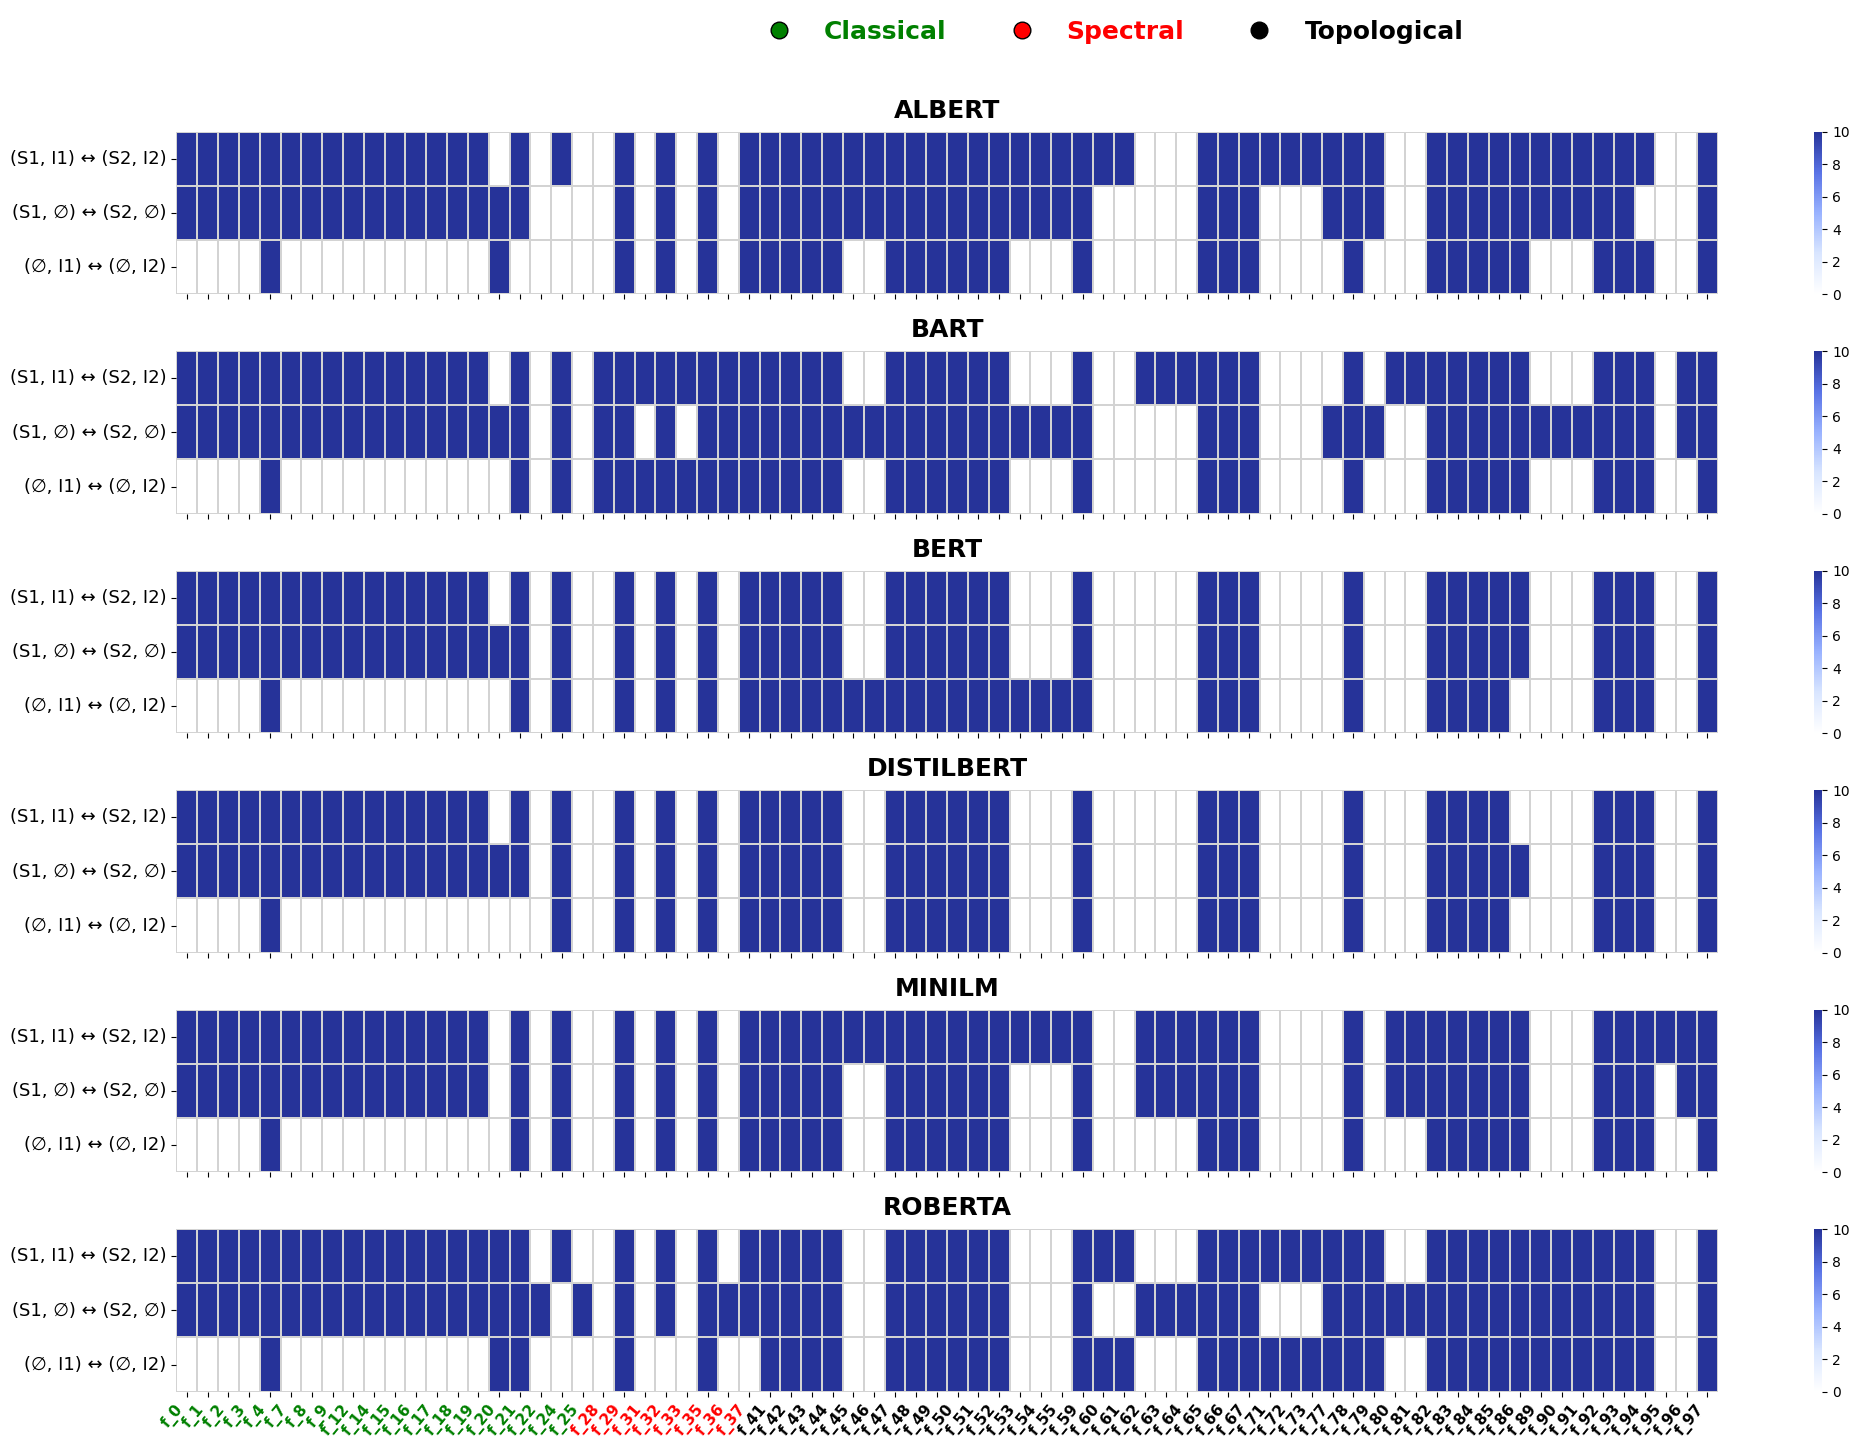

In [3]:
# -*- coding: utf-8 -*-
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# ======================================================
# ⚙️ CONFIG
# ======================================================
import os
from pathlib import Path

ROOT = Path(os.getcwd()).resolve().parent.parent

BASE_PATH =  ROOT / "Experiments/Results/features_selection"
scenarios = ["si_si", "s_s", "i_i"]

SCENARIO_LABELS = {
    "si_si": "(S1, I1) ↔ (S2, I2)",
    "s_s": "(S1, ∅) ↔ (S2, ∅)",
    "i_i": "(∅, I1) ↔ (∅, I2)"
}

# ======================================================
# GROUPES DE FEATURES
# ======================================================



category_colors = {"Classical": "green", "Spectral": "red", "Topological": "black"}

def get_family(f):
    if f in cl: return "Classical"
    if f in sp: return "Spectral"
    return "Topological"


# ======================================================
# 📥 CHARGEMENT JSON MULTIRUN
# ======================================================

dfs = {}
models = set()
selected_features = set()

for scen in scenarios:
    json_path = os.path.join(BASE_PATH, scen, "features_multirun.json")
    with open(json_path, "r") as f:
        dfs[scen] = json.load(f)
        for model in dfs[scen]:
            models.add(model)
            selected_features.update(dfs[scen][model]["frequency"].keys())

models = sorted(models)

cl_sel  = [f for f in cl  if f in selected_features]
sp_sel  = [f for f in sp  if f in selected_features]
top_sel = [f for f in top if f in selected_features]

ordered_selected = cl_sel + sp_sel + top_sel

# 🔥 ICI tu as déjà abbreviate → on le réutilise
abbr_selected = [abbreviate[f] for f in ordered_selected]


# ======================================================
# 🎨 NOUVEAU COLORMAP : BLANC → BLEU NUIT
# ======================================================

colors = [
    (1, 1, 1),        # blanc
    (0.85, 0.9, 1.0),
    (0.6, 0.7, 1.0),
    (0.35, 0.45, 0.9),
    (0.15, 0.2, 0.6)  # bleu nuit
]
white_blue = LinearSegmentedColormap.from_list("white_blue", colors, N=256)


# ======================================================
# 🎨 FIGURE
# ======================================================

n_models = len(models)
fig_width  = max(16, len(ordered_selected) * 0.28)
fig_height = n_models * 2.8

fig, axes = plt.subplots(n_models, 1, figsize=(fig_width, fig_height), sharex=True)
axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]

scenarios_plot = ["i_i", "s_s", "si_si"]



# ======================================================
# 🔥 HEATMAPS
# ======================================================

for i, model in enumerate(models):

    df_model = pd.DataFrame(0, index=scenarios_plot, columns=ordered_selected)

    for scen in scenarios_plot:
        freq = dfs[scen][model]["frequency"]
        for feat in ordered_selected:
            df_model.loc[scen, feat] = freq.get(feat, 0)

    df_model.columns = abbr_selected  # ← utilisation du dict existant

    ax = axes[i]

    sns.heatmap(
        df_model,
        cmap = white_blue,
        vmin=0, vmax=10,
        linewidths=0.3,
        linecolor="lightgray",
        cbar=True,
        ax=ax
    )

    bottom, top = ax.get_ylim()
    ax.set_ylim(top, bottom)

    ax.set_title(model.upper(), fontsize=18, fontweight="bold", color="black", pad=10)
    ax.set_yticklabels([SCENARIO_LABELS[s] for s in scenarios_plot], rotation=0, fontsize=13)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=11)


# ======================================================
# 🔥 COLORATION DES FEATURES
# ======================================================

ax_bottom = axes[-1]
for tick, feat in zip(ax_bottom.get_xticklabels(), ordered_selected):
    tick.set_color(category_colors[get_family(feat)])
    tick.set_fontweight("bold")


# ======================================================
# 🔥 LÉGENDE
# ======================================================

family_labels = ["Classical", "Spectral", "Topological"]
family_colors = ["green", "red", "black"]

handles = [
    mlines.Line2D([], [], color=family_colors[i], marker='o',
                  linestyle='None', markersize=12, markeredgecolor='black')
    for i in range(3)
]

legend = fig.legend(
    handles, family_labels, loc="upper center",
    ncol=3, bbox_to_anchor=(0.5, 0.95),
    fontsize=18, frameon=False
)

for text, color in zip(legend.get_texts(), family_colors):
    text.set_color(color)
    text.set_fontweight("bold")


# ======================================================
# 📐 AJUSTEMENT FINAL
# ======================================================

plt.subplots_adjust(top=0.87, bottom=0.12, left=0.05, right=0.98, hspace=0.35)
plt.show()


In [4]:
import pandas as pd

# ============================
# SCENARIOS + LABELS
# ============================

scenario_labels = {
    "si_si": "(S1, I1) $\\leftrightarrow$ (S2, I2)",
    "s_s_bis": "(S1, $\\varnothing$) $\\leftrightarrow$ (S2, $\\varnothing$)",
    "i_i_bis": "($\\varnothing$, I1) $\\leftrightarrow$ ($\\varnothing$, I2)",
}

scenarios_list = ["si_si", "s_s_bis", "i_i_bis"]

filters = {
    "si_si": ['RandomForest', 'LogisticRegression', 'KNN', 'MLP', 'CatBoost', 'XGBoost'],
    "s_s_bis": ['RandomForest', 'LogisticRegression', 'KNN', 'MLP', 'CatBoost', 'XGBoost'],
    "i_i_bis": ['RandomForest', 'LogisticRegression', 'KNN', 'MLP', 'CatBoost', 'XGBoost'],
}

embedding_names = {
    "albert": "ALBERT",
    "bart": "BART",
    "bert": "BERT",
    "distilbert": "DistilBERT",
    "minilm": "MiniLM",
    "roberta": "RoBERTa",
}

# format LaTeX
def format_latex(mean, std):
    if pd.isna(mean) or pd.isna(std):
        return "--"
    return f"{mean:.2f} $\\pm$ {std:.2f}"

# ============================
# LOAD RAW CSV + CONCAT
# ============================

df_raw = pd.concat(
    [
        pd.read_csv(
            ROOT / f"Experiments/Results/features_selection/ds_fs_{sc}.csv"
        ).assign(scenario=sc)
        for sc in scenarios_list
    ],
    ignore_index=True
)

# ============================
# AGGREGATION : mean + std
# ============================

metrics_to_aggregate = ["precision", "recall", "f1", "MRR", "Recall@GS"]
scenarios_list = ["si_si", "s_s_bis", "i_i_bis"]
df_agg = (
    df_raw.groupby(["scenario", "embedding_model", "classifier"])
    .agg({m: ["mean", "std"] for m in metrics_to_aggregate})
)

df_agg.columns = [f"{m}_{stat}" for m, stat in df_agg.columns]
df_agg = df_agg.reset_index()

# ============================
# LATEX TABLE GENERATION
# ============================

metrics = {
    "Precision": ("precision_mean", "precision_std"),
    "Recall": ("recall_mean", "recall_std"),
    "F1": ("f1_mean", "f1_std"),
}

embeddings_bis = list(embedding_names.keys())

for sc in scenarios_list:

    df_s = df_agg[df_agg.scenario == sc]

    header = (
        "\\begin{table}[!ht]\n"
        "\\footnotesize\n"
        "\\centering\n"
        f"\\caption{{Scores pour le scénario {scenario_labels[sc]} — classifieurs filtrés.}}\n"
        f"\\label{{tab:filtered_{sc}}}\n"
        "\\resizebox{\\columnwidth}{!}{%\n"
        "\\begin{tabular}{l c " + "c" * len(embeddings_bis) + "}\n"
        "\\toprule\n"
        "\\textbf{Classifier} & \\textbf{Metric} & "
        + " & ".join(embedding_names[e] for e in embeddings_bis)
        + " \\\\\n"
        "\\midrule\n"
    )

    body = ""

    for clf in filters[sc]:

        df_c = df_s[df_s.classifier == clf]

        for i, (metric, (mcol, scol)) in enumerate(metrics.items()):

            row = (
                f"\\multirow{{{len(metrics)}}}{{*}}{{{clf}}} & {metric}"
                if i == 0 else f" & {metric}"
            )

            values = []
            for emb in embeddings_bis:
                df_ce = df_c[df_c.embedding_model == emb]

                if df_ce.empty:
                    values.append("--")
                else:
                    r = df_ce.iloc[0]
                    values.append(format_latex(r.get(mcol), r.get(scol)))

            row += " & " + " & ".join(values) + " \\\\\n"
            body += row

        body += "\\midrule\n"

    footer = "\\bottomrule\n\\end{tabular}\n}\n\\end{table}\n"

    print(header + body + footer + "\n\n")


\begin{table}[!ht]
\footnotesize
\centering
\caption{Scores pour le scénario (S1, I1) $\leftrightarrow$ (S2, I2) — classifieurs filtrés.}
\label{tab:filtered_si_si}
\resizebox{\columnwidth}{!}{%
\begin{tabular}{l c cccccc}
\toprule
\textbf{Classifier} & \textbf{Metric} & ALBERT & BART & BERT & DistilBERT & MiniLM & RoBERTa \\
\midrule
\multirow{3}{*}{RandomForest} & Precision & 0.93 $\pm$ 0.24 & 0.95 $\pm$ 0.20 & 0.95 $\pm$ 0.21 & 0.95 $\pm$ 0.20 & 0.94 $\pm$ 0.22 & 0.95 $\pm$ 0.20 \\
 & Recall & 0.81 $\pm$ 0.31 & 0.83 $\pm$ 0.29 & 0.84 $\pm$ 0.29 & 0.84 $\pm$ 0.28 & 0.82 $\pm$ 0.30 & 0.83 $\pm$ 0.29 \\
 & F1 & 0.84 $\pm$ 0.29 & 0.87 $\pm$ 0.26 & 0.87 $\pm$ 0.26 & 0.87 $\pm$ 0.25 & 0.85 $\pm$ 0.28 & 0.86 $\pm$ 0.26 \\
\midrule
\multirow{3}{*}{LogisticRegression} & Precision & 0.27 $\pm$ 0.17 & 0.27 $\pm$ 0.17 & 0.27 $\pm$ 0.17 & 0.27 $\pm$ 0.17 & 0.27 $\pm$ 0.17 & 0.26 $\pm$ 0.17 \\
 & Recall & 0.93 $\pm$ 0.17 & 0.93 $\pm$ 0.17 & 0.94 $\pm$ 0.13 & 0.93 $\pm$ 0.17 & 0.93 $\pm$ 0.15 & 0.